In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import fsolve
from scipy.stats import binom, gamma, norm

mpl.rcParams['figure.dpi'] = 300

### Task A

In [2]:
D = np.loadtxt('3.data')
mu1 = np.mean(D)
mu2 = np.mean(D ** 2)

### Task B

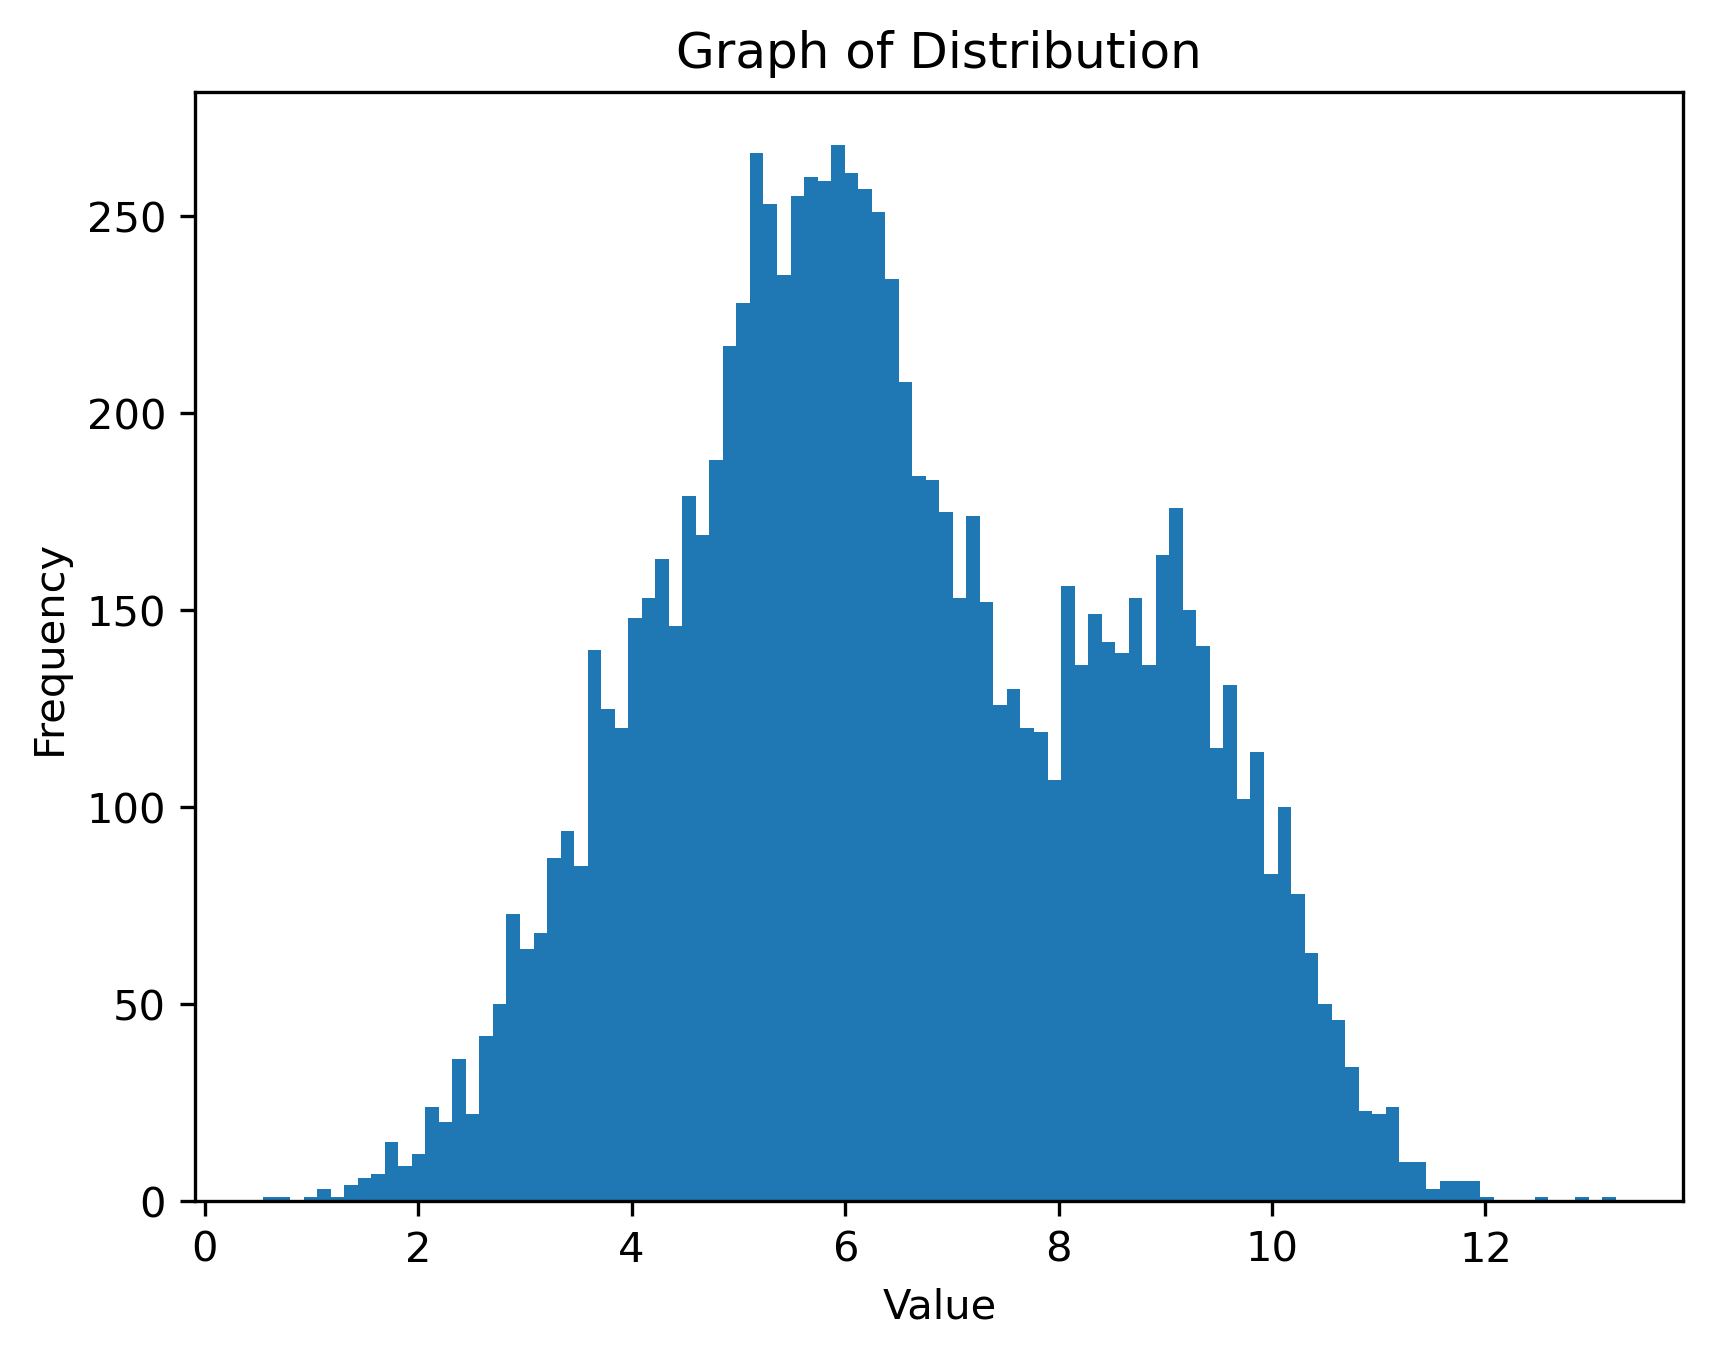

In [3]:
plt.hist(D, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Graph of Distribution')
plt.savefig("3b.png", bbox_inches="tight")
plt.show()

The dataset seems centered to the right of 6 and left of 7 (because of the spike near 9). The normal distribution parameter $\mu$ could be about 6.5

### Task C
For a binomial distribution X ~ (n, p)

$E[X] = \mu_1 = np$  
$E[X^2] = E[(X- E[X])^2] + E[X]^2 = np(1-p) + (np)^2$


In [4]:
def binomial_equations(vars):
    p, n = vars
    eq1 = mu1 - (n * p)
    eq2 = mu2 - (mu1 ** 2) - (n * p * (1 - p))
    return [eq1, eq2]

init_guess = [0.5, 15]
solution = fsolve(binomial_equations, init_guess)

print("Solution:", solution)

Solution: [ 0.32968653 19.70400679]


We take n to be 20 since it satisfies the equality more.

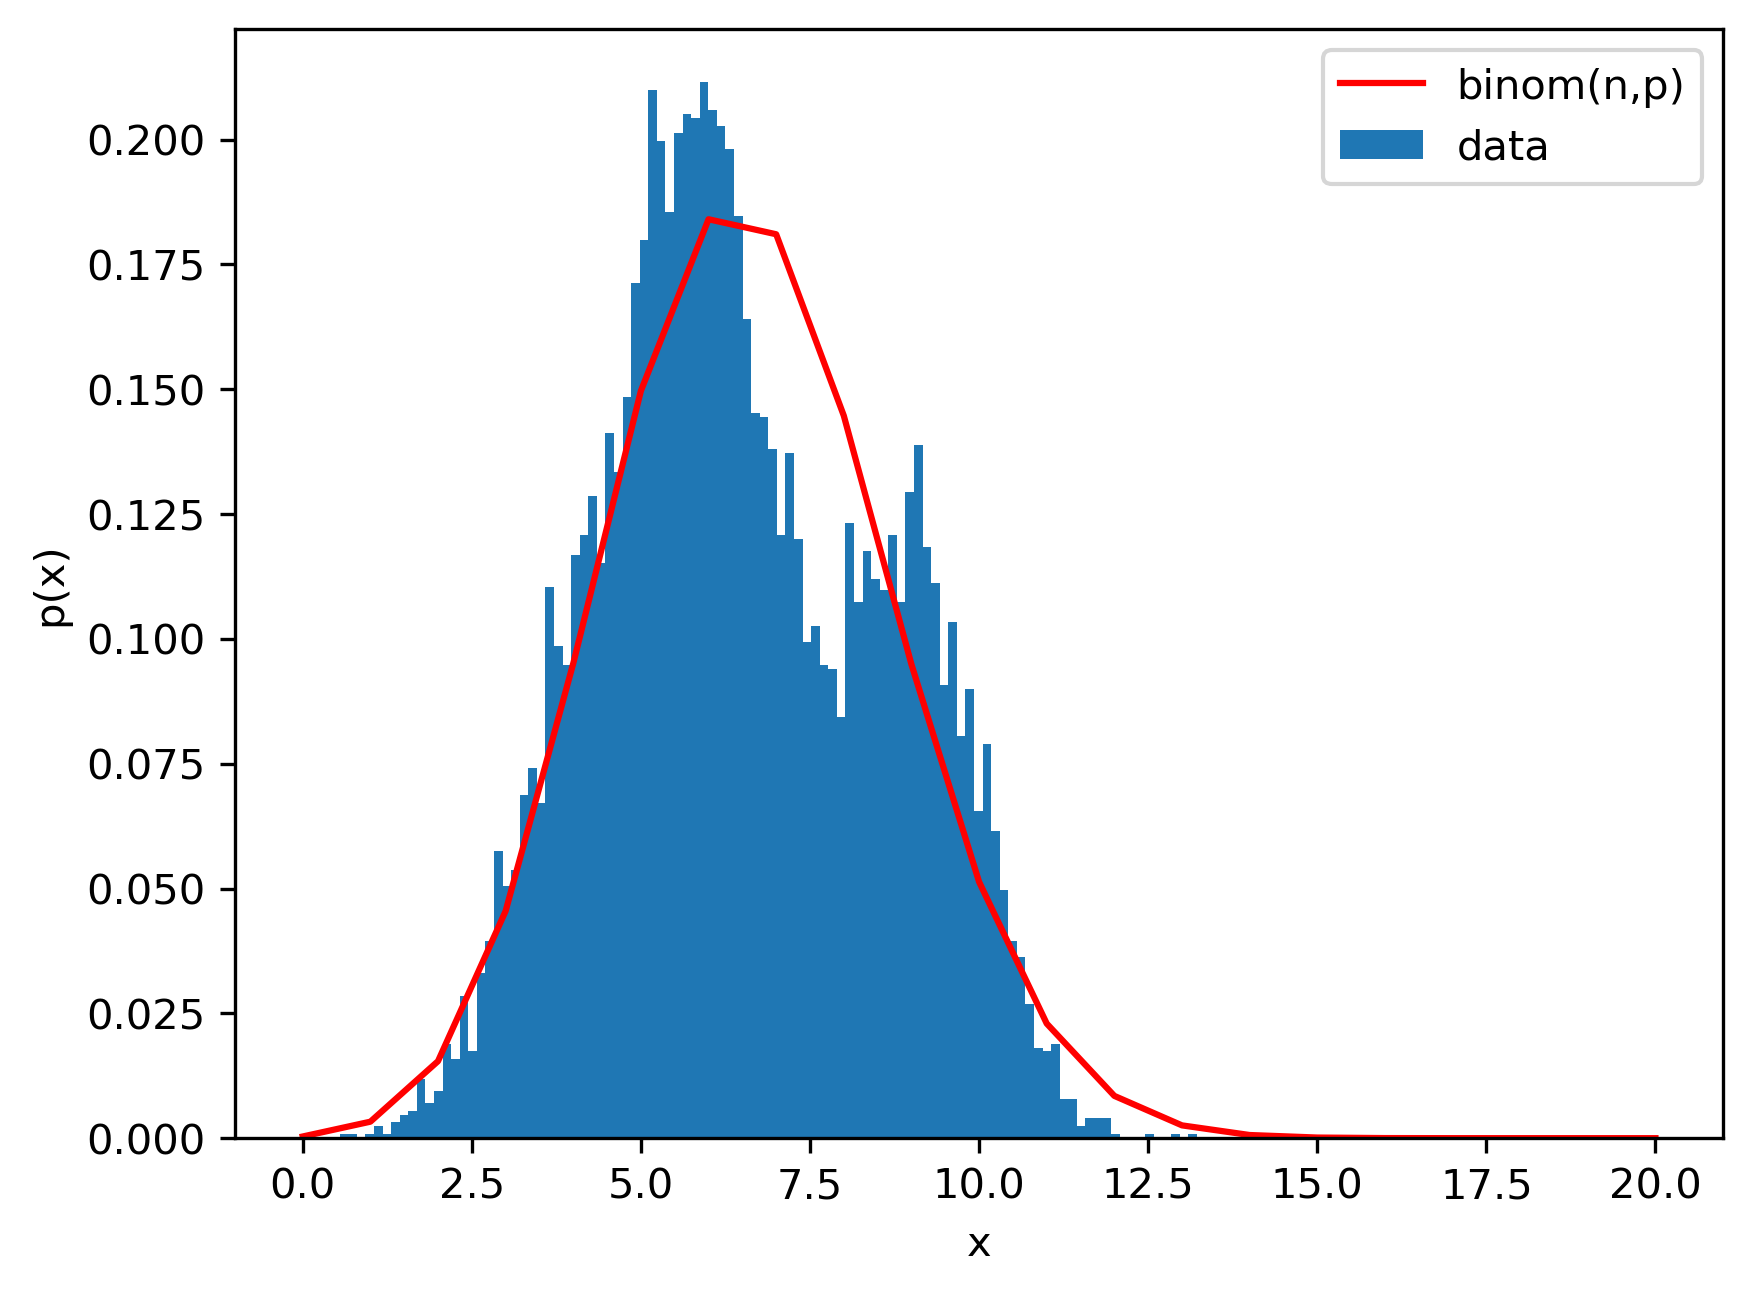

In [5]:
n = 20
p = solution[0]

x = np.linspace(0, n, num=n+1)
bin_dist = binom.pmf(x, n, p)

plt.plot(x, bin_dist, 'r-', label='binom(n,p)')
plt.hist(D, bins=100, density=True, label='data')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.savefig("3c.png", bbox_inches="tight")
plt.show()

### Task D

$\mu_1 = \int_0^\infty \frac{1}{\theta^k\Gamma(k)} x^ke^{-\frac{x}{\theta}} dx$  
$\mu_2 = \int_0^\infty \frac{1}{\theta^k\Gamma(k)} x^{k+1}e^{-\frac{x}{\theta}} dx$  
Substituting $x$ with $t \theta$ we get:  
$\mu_1 = \int_0^\infty \frac{1}{\theta^k\Gamma(k)} \theta^{k+1}t^ke^{-t} dt$  
$\mu_2 = \int_0^\infty \frac{1}{\theta^k\Gamma(k)} \theta^{k+2}t^{k+1}e^{-t} dt$  
Taking the constants out and using the formula $\Gamma(k + 1) = k\Gamma(k)$ we get:  
> $\mu_1 = k\theta$  
$\mu_2 = (k+1)k\theta^2$

In [6]:
def gamma_equations(vars):
    k, theta = vars
    eq1 = mu1 - (k * theta)
    eq2 = mu2 - (k * (k + 1) * theta ** 2)
    return [eq1, eq2]

init_guess = [9.69, 0.67]
solution = fsolve(gamma_equations, init_guess)

print("Solution:", solution)

Solution: [9.69120554 0.67031347]


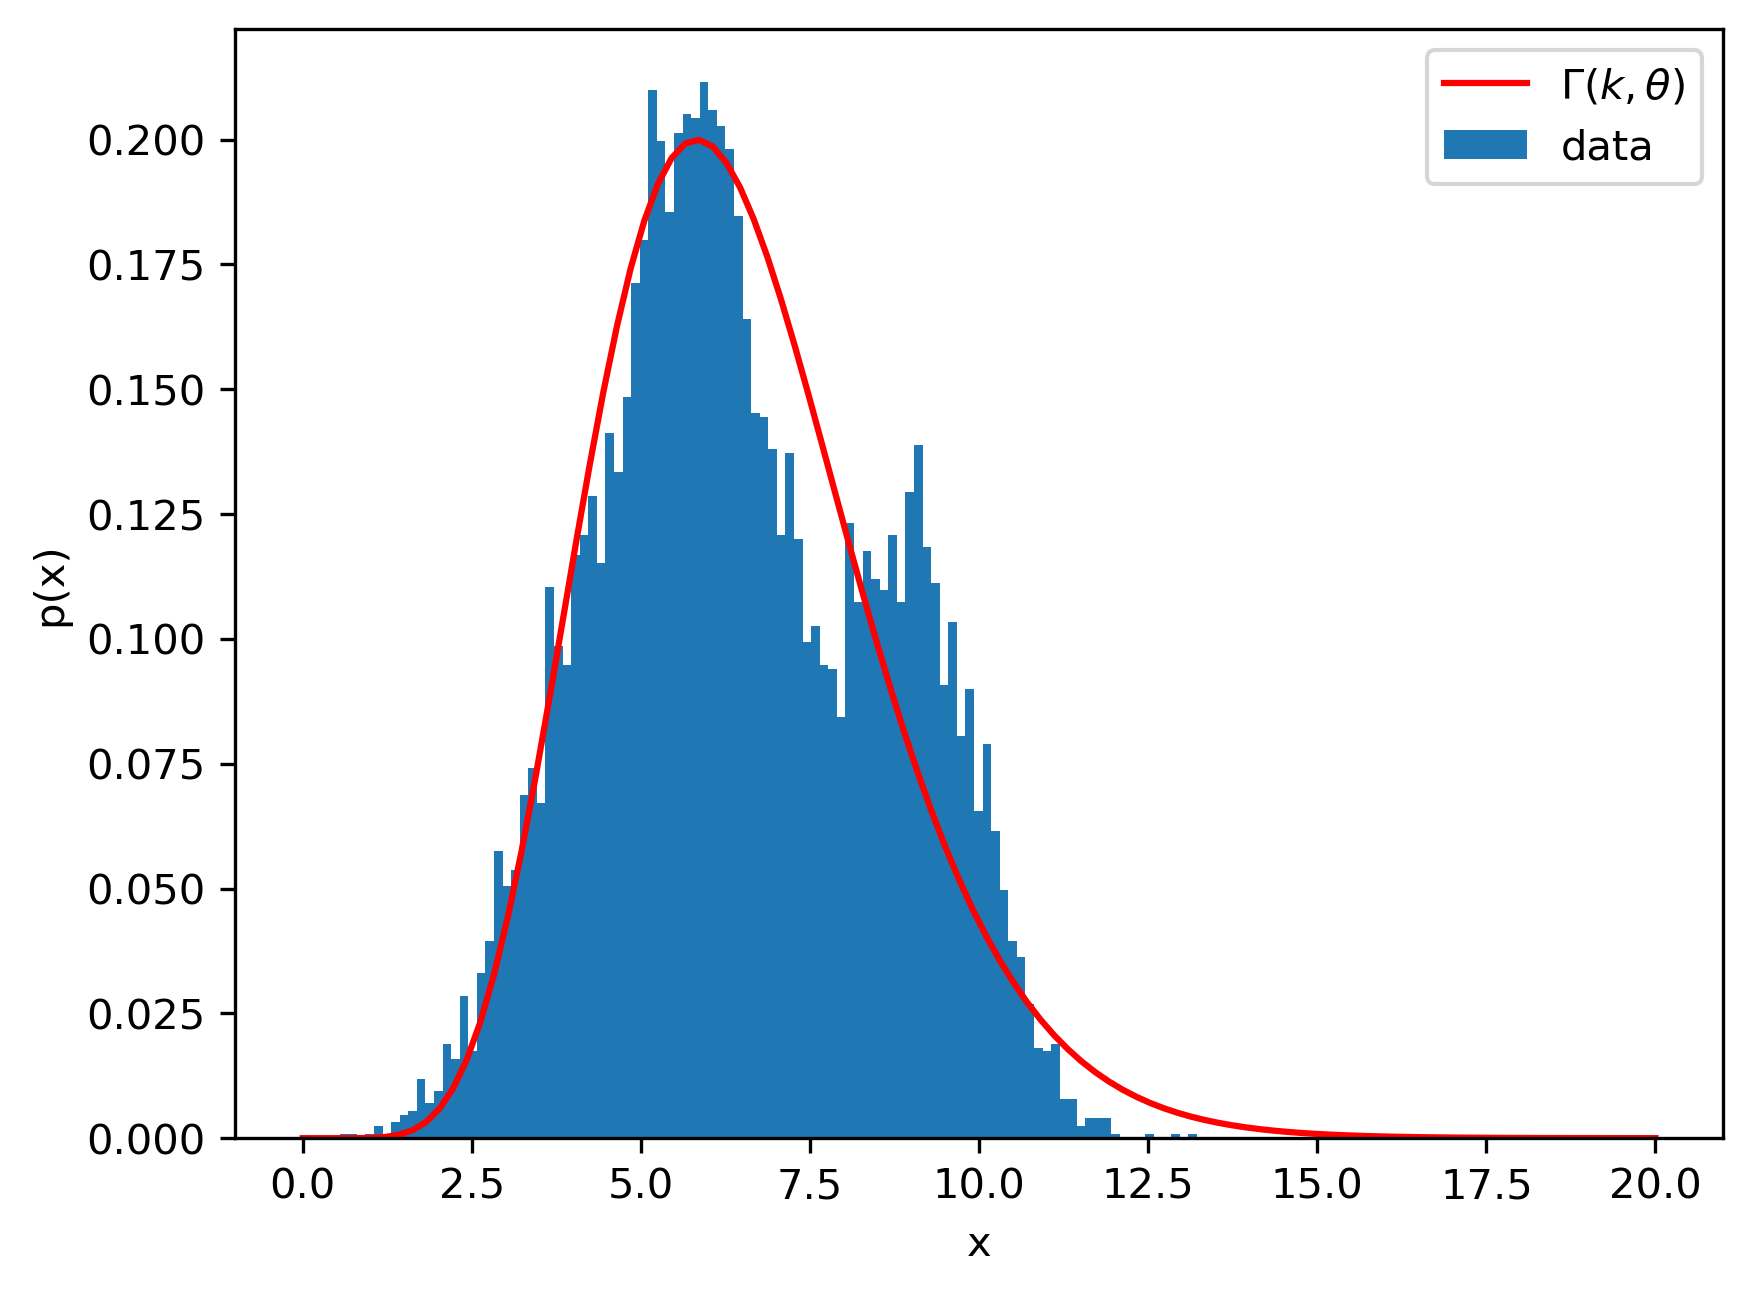

In [7]:
x = np.linspace(0, 20, num=100)
gamma_dist = gamma.pdf(x, solution[0], loc=0, scale=solution[1])

plt.plot(x, gamma_dist, 'r-', label='$\\Gamma(k,\\theta$)')
plt.hist(D, bins=100, density=True, label='data')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.savefig("3d.png", bbox_inches="tight")
plt.show()

### Task E

In [8]:
rounded_data = np.round(D)
bin_dist = binom.pmf(rounded_data, n, p)
gamma_dist = gamma.pdf(D, solution[0], loc=0, scale=solution[1])

bin_likelihood = np.mean(np.log(bin_dist))
gamma_likelihood = np.mean(np.log(gamma_dist))

print("Log Likelihood of the binomial distribution: ", bin_likelihood)
print("Log Likelihood of the gamma distribution: ", gamma_likelihood)

Log Likelihood of the binomial distribution:  -2.157068115435707
Log Likelihood of the gamma distribution:  -2.1608217722066265


Since the log likelihood for the binomial distribution is more than that of the gamma distribution, we can say that the *binomial* distribution did a better job at estimating the distribution.

### Task F

In [9]:
mu3 = np.mean(D ** 3)
mu4 = np.mean(D ** 4)

def gmm_equations(vars):
    p1, p2, m1, m2 = vars
    eq1 = mu1 - ((p1 * m1) + (p2 * m2))
    eq2 = mu2 - ((p1 * (1 + (m1 ** 2))) + (p2 * (1 + (m2 ** 2))))
    eq3 = mu3 - ((p1 * ((m1 ** 3) + (3 * m1))) + (p2 * ((m2 ** 3) + (3 * m2))))
    eq4 = mu4 - ((p1 * ((m1 ** 4) + (6 * (m1 ** 2)) + 3)) + (p2 * ((m2 ** 4) + (6 * (m2 ** 2)) + 3)))
    return [eq1, eq2, eq3, eq4]

init_guess = [0.7, 0.3, 6, 9]
solution = fsolve(gmm_equations, init_guess)

print("Solution: ", solution)

Solution:  [0.61187403 0.38264565 5.12960769 8.77436305]


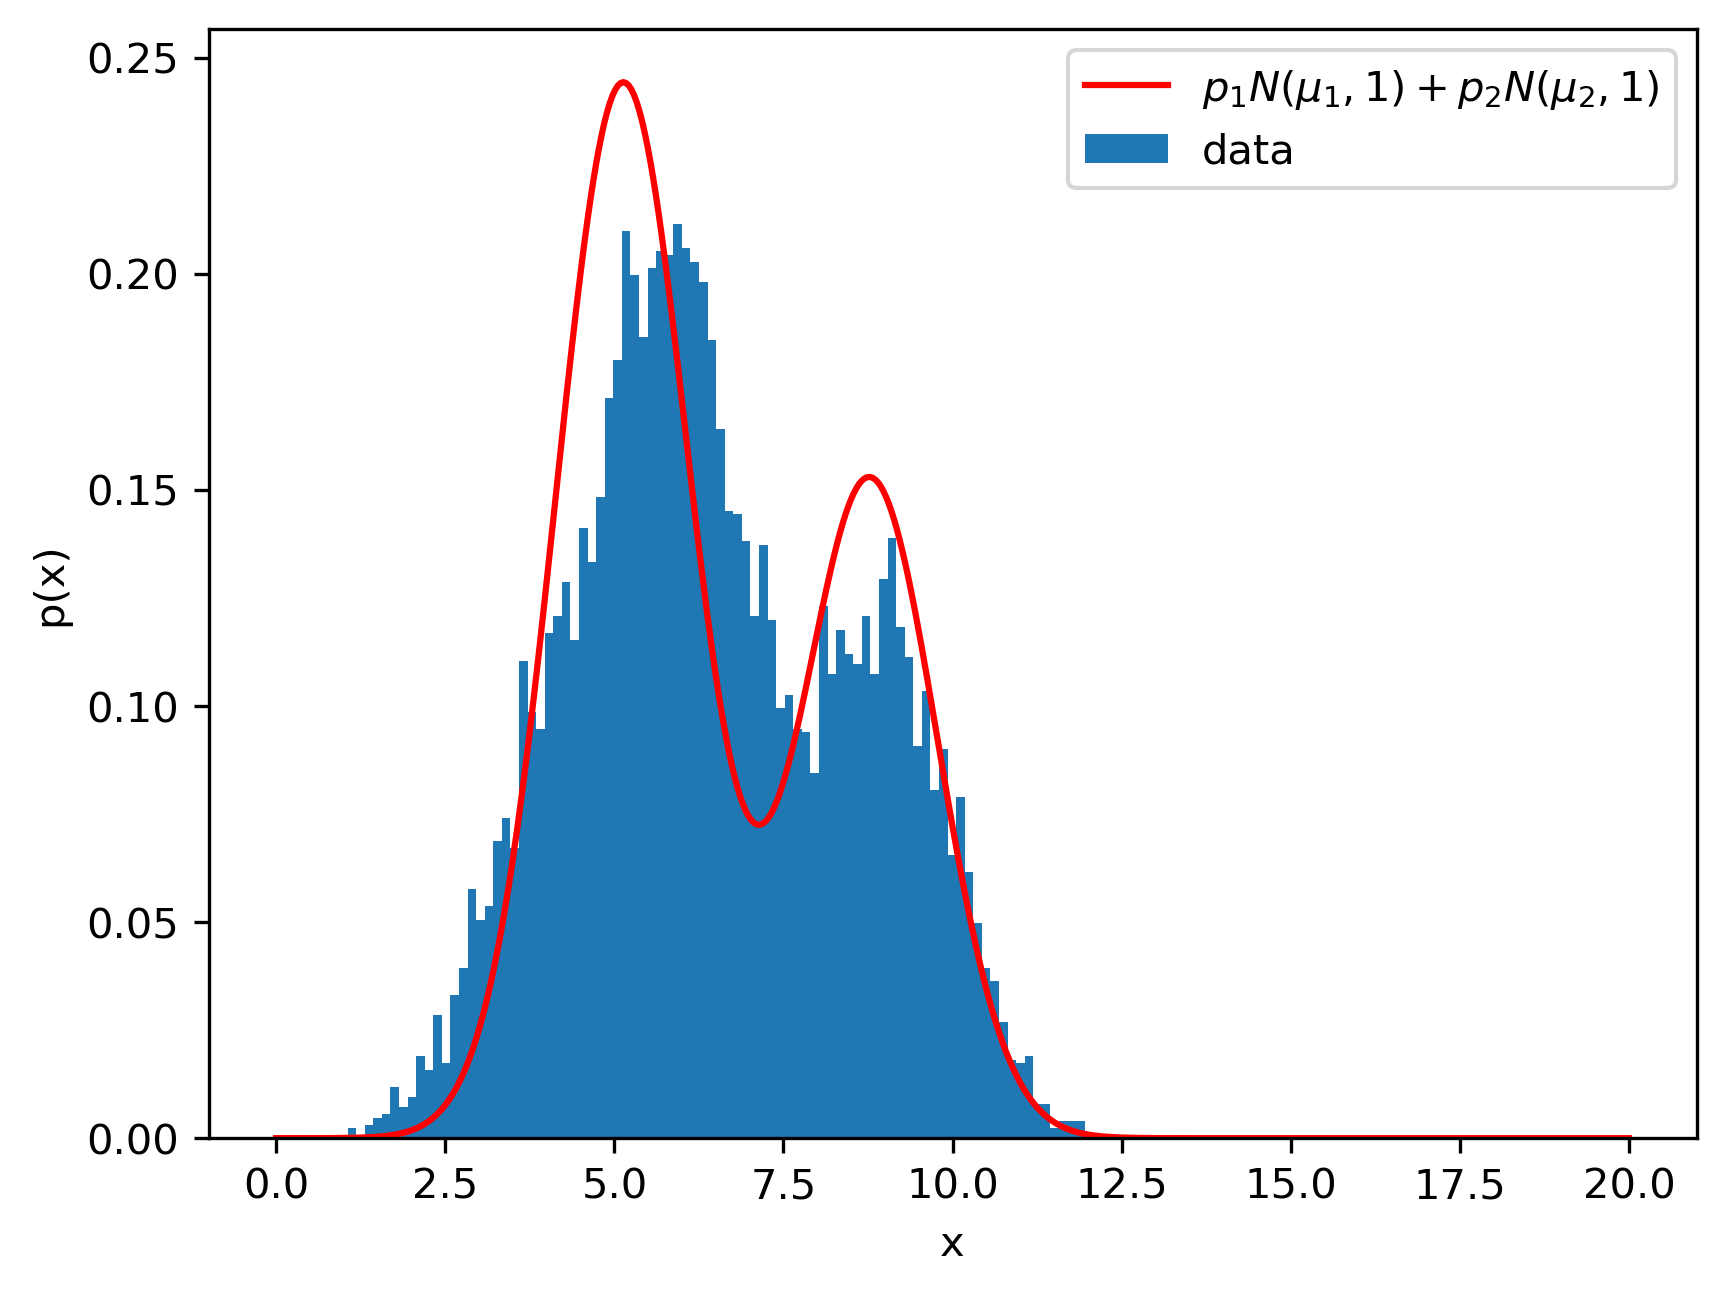

In [10]:
x = np.linspace(0, 20, num = 500)
norm_dist_1 = norm.pdf(x, loc=solution[2], scale=1)
norm_dist_2 = norm.pdf(x, loc=solution[3], scale=1)
final_dist = ((solution[0] * norm_dist_1) + (solution[1] * norm_dist_2))

plt.plot(x, final_dist, 'r-', label='$p_1N(\\mu_1, 1) + p_2N(\\mu_2, 1)$')
plt.hist(D, bins=100, density=True, label='data')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.savefig("3f.png", bbox_inches="tight")
plt.show()

In [11]:
norm_dist_1 = norm.pdf(D, loc=solution[2], scale=1)
norm_dist_2 = norm.pdf(D, loc=solution[3], scale=1)
gmm_dist = ((solution[0] * norm_dist_1) + (solution[1] * norm_dist_2))
gmm_likelihood = np.mean(np.log(gmm_dist))
print("Log Likelihood of the gmm distribution: ", gmm_likelihood)

Log Likelihood of the gmm distribution:  -2.1830387449165154


The Gaussian Mixture Model is a worse fit compared to the rest